<a href="https://colab.research.google.com/github/bgdnff/TVMS/blob/master/TV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Задача 1__

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: 
```
football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
lifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]
```


In [0]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')


In [0]:
football_players = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey_players = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
lifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

n1 = football_players.shape[0]
n2 = hockey_players.shape[0]
n3 =lifters.shape[0]

Выборочные средние по каждой группе:

In [0]:
fp_mean = football_players.mean()
hp_mean = hockey_players.mean()
lf_mean = lifters.mean()

fp_mean, hp_mean, lf_mean

(179.125, 178.66666666666666, 172.72727272727272)

Видно, что средний рост по группам различается не очень сильно. Проверим статистическую значимость различий

In [0]:
y = np.concatenate([football_players, hockey_players, lifters])

print(y)

[173 175 180 178 177 185 183 182 177 179 180 188 177 172 171 184 180 172
 173 169 177 166 180 178 177 172 166 170]


In [0]:
y_mean = y.mean()
y_mean

176.46428571428572

Найдём значения $S_F$ и $S_{res}$:

In [0]:
S2_F = n1 * (fp_mean - y_mean) ** 2 + n2 * (hp_mean - y_mean) ** 2 + n3 * (lf_mean - y_mean) ** 2

S2_res = ((football_players - fp_mean) ** 2).sum() + ((hockey_players - hp_mean) ** 2).sum() + ((lifters - lf_mean) ** 2).sum()

S2_F, S2_res

(253.9074675324678, 577.0568181818182)

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [0]:
S2_F + S2_res, ((y - y_mean) ** 2).sum()

(830.964285714286, 830.9642857142854)

видим равенство в пределах погрешности вычислений

_

Запишем оценки дисперсий:




In [0]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(126.9537337662339, 23.08227272727273)

Итак, значение статистики $T$:

In [0]:
T = sigma2_F / sigma2_res
T

5.500053450812598

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [0]:
from scipy import stats

In [0]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.3851899614491687

Видим, что $T > F_{crit}$, поэтому заключаем, что отличие среднего роста по предложенным выборкам действительно является статистически значимым.

_Задание 2 (курсовой проект)_

#### Статистический обзор роста военнослужащих US Army и проверка наличия статистически значимого отличия в росте по расам

Датасет "The 2012 US Army Anthropometric Survey (ANSUR II)" содержит антропометрические измерения служащих армии США по 93м параметрам, в данном исследовании рассмотрим измерения только по мужчинам и только их рост

_следует иметь в виду, что выборка не репрезентативная и распространять полученные результаты на всю популяцию следует с осторожностью_

In [0]:
df = pd.read_csv('Distribution/ANSUR II MALE Public.csv', encoding='cp1251')
pd.options.display.max_columns = 120

In [0]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [0]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [0]:
df.shape

(4082, 108)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


В датасете используется рост в дюймах, добавим столбец с ростом в сантиметрах

In [0]:
df['Heightcm'] = df['Heightin']*2.54

Рассмотрим распределение роста по всей выборке:

средний рост:

In [0]:
df['Heightcm'].mean()

177.89084762371562

медиана:

In [0]:
df['Heightcm'].median()

177.8

In [0]:
# среднее квадратическое отклонение:
df['Heightcm'].std(ddof=0)

7.485526502714289

Дисперсия смещённая:

In [0]:
df['Heightcm'].var(ddof=0)

56.03310702283802

и несмещённая:

In [0]:
df['Heightcm'].var(ddof=1)

56.046837262245724

Построим гистограмму:

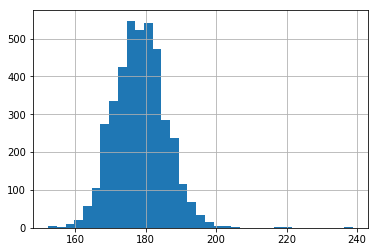

In [0]:
df['Heightcm'].hist(bins=35)

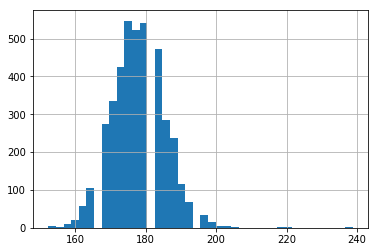

In [0]:
df['Heightcm'].hist(bins=40)

в целом, проглядывается что-то нормальное :)

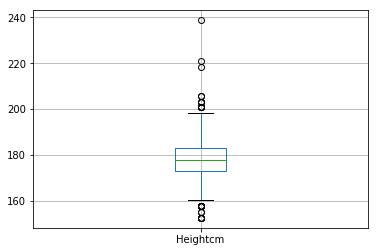

In [0]:
df[['Heightcm']].boxplot()

Видим довольно компактное ядро со значительными выбросами вверх (из опыта и общих соображений можно заметить что вообще рост людей на хвостах теряет симметричность)

### Проверка статистической значимости различия роста по расам

расу служащего показывает поле DDORace. описание поля:

DODRace – Department of Defense Race; a single digit indicating a subject’s
self-reported preferred single race where selecting multiple races is not an option.
This variable is intended to be comparable to the Defense Manpower Data Center
demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,
5 = Native American, 6 = Pacific Islander, 8 = Other

возьмем отдельные выборки роста по расам

In [0]:
x1 = df.loc[df['DODRace']==1, 'Heightcm']
x2 = df.loc[df['DODRace']==2, 'Heightcm']
x3 = df.loc[df['DODRace']==3, 'Heightcm']
x4 = df.loc[df['DODRace']==4, 'Heightcm']
x5 = df.loc[df['DODRace']==5, 'Heightcm']
x6 = df.loc[df['DODRace']==6, 'Heightcm']
x7 = df.loc[df['DODRace']>6, 'Heightcm']
X = np.array([x1,x2,x3,x4,x5,x6,x7])
Y = np.concatenate(X)

n = np.array([_.shape[0] for _ in X])
n

array([2817,  642,  440,  117,   29,   34,    3])

Выборочные средние по каждой группе:

In [0]:
X_means = np.array([_.mean() for _ in X])
X_means

array([178.63855165, 178.72579439, 173.82836364, 171.98188034,
       178.50068966, 172.79470588, 175.26      ])

видно что все группы расходятся на 2 кластера (1,2 и 5 группы в один, и 3,4 и 6 в другой. седьмая группа Other где-то посередине)

Проверим статистическую значимость различий с помощью дисперсионного анализа

In [0]:
y_mean = Y.mean()
y_mean

177.89084762371385

Сумма квадратов отклонений наблюдений от общего среднего:

In [0]:
S2 = ((Y - y_mean) ** 2).sum()
S2

228727.14286722196

сумма квадратов отклонений средних групповых значений от общего среднего значения:

In [0]:
#S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2
S2_F = (n*(X_means-y_mean)**2).sum()
S2_F

14283.810090221887

остаточная сумма квадратов отклонений:


In [0]:
#S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()


In [0]:
S2_res = (np.array([_.sum() for _ in (X - X_means)**2])).sum()
S2_res

214443.33277700338

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [0]:
S2 - (S2_F+S2_res)

-3.3178366720676422e-09

совпадение в пределах погрешности

произведем оценку дисперсии

In [0]:
k = X.shape[0]

k1 = k - 1
k2 = n.sum() - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(2380.6350150369813, 52.62413074282291)

Итак, значение статистики $T$:

In [0]:
T = sigma2_F / sigma2_res
T

45.23846724749295

Для уровеня значимости $\alpha = 0.05$ найдём критическое значение $F_{crit}$:

In [0]:
from scipy import stats

In [0]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

2.100811275673964

Таким образом, различия в росте военнослужащих US Army по расам можно считать статистически существенным.

Вышеприведенные вычисления можно собрать в функцию

In [0]:
def var_analysis(X):  # X - np.array данных по категориям
    Y = np.concatenate(X)
    n = np.array([_.shape[0] for _ in X])
    X_means = np.array([_.mean() for _ in X])
    y_mean = Y.mean()
    S2_F = (n*(X_means-y_mean)**2).sum()
    S2_res = (np.array([_.sum() for _ in (X - X_means)**2])).sum()
    
    k = X.shape[0]
    k1 = k - 1
    k2 = n.sum() - k

    sigma2_F = S2_F / k1
    sigma2_res = S2_res / k2
    T = sigma2_F / sigma2_res
    
    from scipy import stats
    alpha = 0.05

    F_crit = stats.f.ppf(1 - alpha, k1, k2)
    return T, F_crit          

In [0]:
var_analysis(X)

(45.23846724749295, 2.100811275673964)

Если взять только данные по 1,2,5 группам, то получим:

In [0]:
var_analysis(np.array([x1,x2,x5]))

(0.044110727482651345, 2.9983089039832436)

различия практически незаметны

Если взять только данные по 3,4,6 и 7 группам, то получим:

In [0]:
var_analysis(np.array([x3,x4,x6,x7]))

(2.2003493643991043, 2.6200060860764567)

здесь на грани, но тоже в "зоне незначительности"